In [2]:
positive_words = {
    "exponential", "millionaires", "recover", "bullish", "strength", "great", "profits",
    "upward", "growth", "promising", "successful", "increasing", "breakout", "rise",
    "potential", "solid", "gain", "strong", "impulse", "success"
}

negative_words = {
    "bearish", "struggle", "bubble", "popped", "worse", "bias", "down", "correction",
    "resistance", "breakdown", "negative", "declining", "fall", "sideways", "selling",
    "lower", "downtrend", "false", "crab", "wait"
}

def label_sentence(sentence, positive_words, negative_words):
    words = set(sentence.lower().split())
    if words.intersection(positive_words):
        return "Positive"
    elif words.intersection(negative_words):
        return "Negative"
    else:
        return "Neutral"

input_file = 'data/BTC_normalized.txt'  
output_file = 'data/BTC_labeled.txt' 

with open(input_file, 'r') as file:
    btc_sentences = file.readlines()

# Remove empty lines because they make problem in sentiment part
btc_sentences = [sentence.strip() for sentence in btc_sentences if sentence.strip()]

btc_labels = [label_sentence(sentence, positive_words, negative_words) for sentence in btc_sentences]

with open(output_file, 'w') as out_file:
    for sentence, label in zip(btc_sentences, btc_labels):
        out_file.write(f"Sentence: {sentence} | Sentiment: {label}\n")

print(f"Sentiment labeling complete. Results saved to {output_file}.")


Sentiment labeling complete. Results saved to data/BTC_labeled.txt.


Counter({'Positive': 444, 'Neutral': 354, 'Negative': 177})




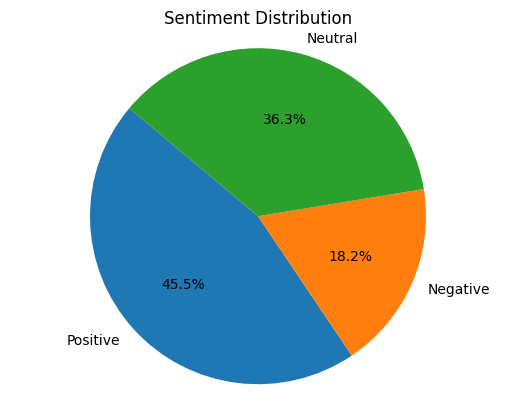

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

with open('data/BTC_labeled.txt', 'r') as file:
    labels = [line.split("| Sentiment: ")[1].strip() for line in file.readlines()]

sentiment_counts = Counter(labels)
print(sentiment_counts)


sentiments = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment_counts['Positive'], sentiment_counts['Negative'], sentiment_counts['Neutral']]
print('\n')
plt.pie(sizes, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Sentiment Distribution')
plt.show()

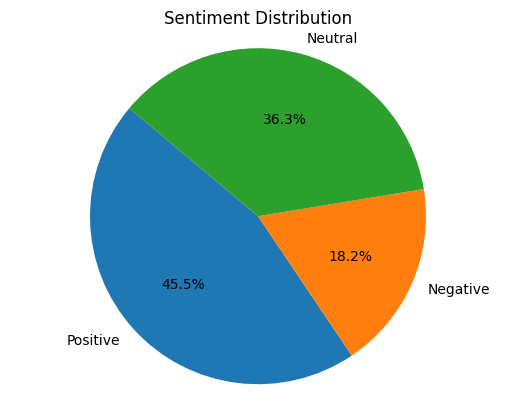

In [4]:
import matplotlib.pyplot as plt

sentiments = ['Positive', 'Negative', 'Neutral']
sizes = [sentiment_counts['Positive'], sentiment_counts['Negative'], sentiment_counts['Neutral']]

plt.pie(sizes, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Sentiment Distribution')
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

with open('data/BTC_labeled.txt', 'r') as file:
    data = file.readlines()

sentences = [line.split('| Sentiment: ')[0].replace("Sentence: ", "").strip() for line in data]
labels = [line.split('| Sentiment: ')[1].strip() for line in data]

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = LogisticRegression()
clf.fit(X_train_tfidf, y_train)

y_pred = clf.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))

def predict_sentiment(prompt):
    prompt_tfidf = vectorizer.transform([prompt])

    predicted_sentiment = clf.predict(prompt_tfidf)[0]

    return predicted_sentiment




              precision    recall  f1-score   support

    Negative       0.90      0.23      0.37        39
     Neutral       0.81      0.93      0.87        71
    Positive       0.76      0.93      0.84        85

    accuracy                           0.79       195
   macro avg       0.82      0.70      0.69       195
weighted avg       0.81      0.79      0.75       195



In [14]:
new_prompt = input("Enter a sentence to predict sentiment: ")
predicted_sentiment = predict_sentiment(new_prompt)
print(f"Predicted Sentiment: {predicted_sentiment}")

Enter a sentence to predict sentiment: It can be seen from chart that there will be decreaseing in the bitcoin price
Predicted Sentiment: Neutral
